<a href="https://colab.research.google.com/github/Alireza-cman/Alireza-cman.github.io/blob/master/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random as rd
import numpy as np
import pandas as pd 
from numpy import random

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
def find_index(x, x_list):
    for i in range (len(x_list)):
        if (x_list[i] == x ): 
            return i 

In [ ]:
class Normal():
    def __init__(self):
        self.load().trim()
    def load(self):
        address_flow = './drive/MyDrive/Colab/Ocil/NEWDataset/OHV/Flow_OHV.csv'
        address_pressure = './drive/MyDrive/Colab/Ocil/NEWDataset/OHV/Pressure_OHV.csv'
        address_volume = './drive/MyDrive/Colab/Ocil/NEWDataset/OHV/Volume_OHV.csv'
        self.flow = pd.read_csv(address_flow,header=None)
        print('flow is loaded')
        self.pressure = pd.read_csv(address_pressure,header=None)
        print('pressure is loaded')
        self.volume = pd.read_csv(address_volume,header=None)
        print('volume is loaded')
        return self
    def trim(self):
        self.flow = self.flow.drop(range(1019,len(self.flow)),axis = 0).drop(0, axis = 0 )
        self.pressure = self.pressure.drop(range(1019,len(self.pressure)),axis = 0).drop(0, axis = 0 )
        self.volume = self.volume.drop(range(1019,len(self.volume)),axis = 0).drop(0, axis = 0 )
        #
        self.flow_patient_ID = self.flow[0].to_list()
        self.flow_label = self.flow[1].to_list()
        self.flow_data= self.flow.drop([0,1,2,3,4,5],axis = 1).to_numpy()
        #
        self.pressure_patient_ID = self.pressure[0].to_list()
        self.pressure_label = self.pressure[1].to_list()
        self.pressure_data= self.pressure.drop([0,1,2,3,4,5],axis = 1).to_numpy()
        #
        self.volume_patient_ID = self.volume[0].to_list()
        self.volume_label = self.volume[1].to_list()
        self.volume_data= self.volume.drop([0,1,2,3,4,5],axis = 1).to_numpy()
        
        self.data = np.stack((self.flow_data,self.pressure_data,self.volume_data),axis=-1)
        #
        patient_ID = [x.split('_')[1] for x in self.flow_patient_ID]
        self.patient_ID , self.patient_ID_pos = np.unique(patient_ID,return_index=True)
        return self
    def make_dataset(self,ratio = 0.7):    
        train_data = np.array([])
        test_data = np.array([])
        train_samples = rd.sample(self.patient_ID.tolist(),int(len(self.patient_ID)*ratio))
        test_samples = [x for x in self.patient_ID.tolist() if x not in train_samples]

        for i in train_samples:
            p_idx = find_index(str(i), self.patient_ID)
            if p_idx+1 < len(self.patient_ID_pos):
                train_data = np.append(train_data,self.data[self.patient_ID_pos[p_idx]:self.patient_ID_pos[p_idx+1]] )
            else:
                train_data = np.append(train_data,self.data[self.patient_ID_pos[p_idx]:])

        train_data = train_data.reshape(-1,5120,3).astype(np.float32)


        for i in test_samples:
            p_idx = find_index(str(i), self.patient_ID)
            if p_idx+1 < len(self.patient_ID_pos):
                test_data = np.append(test_data,self.data[self.patient_ID_pos[p_idx]:self.patient_ID_pos[p_idx+1] ] )
            else:
                test_data = np.append(test_data,self.data[self.patient_ID_pos[p_idx]:])

        test_data = test_data.reshape(-1,5120,3).astype(np.float32)
        
        y_train = ['NORMAL' for i in range(len(train_data))]
        y_test =  ['NORMAL' for i in range(len(test_data))]
        return train_data ,y_train , test_data,y_test

In [ ]:
class Restriction():
    def __init__(self):
        self.load().trim()
    def load(self):
        address_flow = './drive/MyDrive/Colab/Ocil/NEWDataset/ILD/Flow_ILD.csv'
        address_pressure = './drive/MyDrive/Colab/Ocil/NEWDataset/ILD/Pressure_ILD.csv'
        address_volume = './drive/MyDrive/Colab/Ocil/NEWDataset/ILD/Volume_ILD.csv'
        self.flow = pd.read_csv(address_flow,header=None)
        print('flow is loaded')
        self.pressure = pd.read_csv(address_pressure,header=None)
        print('pressure is loaded')
        self.volume = pd.read_csv(address_volume,header=None)
        print('volume is loaded')
        return self
    def trim(self):
        self.flow = self.flow.drop(0, axis = 0 )
        self.pressure = self.pressure.drop(0, axis = 0 )
        self.volume = self.volume.drop(0, axis = 0 )
        #
        self.flow_patient_ID = self.flow[0].to_list()
        self.flow_label = self.flow[1].to_list()
        self.flow_data= self.flow.drop([0,1,2,3,4,5],axis = 1).to_numpy()
        #
        self.pressure_patient_ID = self.pressure[0].to_list()
        self.pressure_label = self.pressure[1].to_list()
        self.pressure_data= self.pressure.drop([0,1,2,3,4,5],axis = 1).to_numpy()
        #
        self.volume_patient_ID = self.volume[0].to_list()
        self.volume_label = self.volume[1].to_list()
        self.volume_data= self.volume.drop([0,1,2,3,4,5],axis = 1).to_numpy()
        
        self.data = np.stack((self.flow_data,self.pressure_data,self.volume_data),axis=-1)
        #
        patient_ID = [x.split('-')[1].split('_')[0] for x in self.flow_patient_ID]

        self.patient_ID , self.patient_ID_pos = np.unique(patient_ID,return_index=True)
        return self
    def make_dataset(self,ratio = 0.7):    
        train_data = np.array([])
        test_data = np.array([])
        train_samples = rd.sample(self.patient_ID.tolist(),int(len(self.patient_ID)*ratio))
        test_samples = [x for x in self.patient_ID.tolist() if x not in train_samples]

        for i in train_samples:
            p_idx = find_index(str(i), self.patient_ID)
            if p_idx+1 < len(self.patient_ID_pos):
                train_data = np.append(train_data,self.data[self.patient_ID_pos[p_idx]:self.patient_ID_pos[p_idx+1]] )
            else:
                train_data = np.append(train_data,self.data[self.patient_ID_pos[p_idx]:])

        train_data = train_data.reshape(-1,5120,3).astype(np.float32)


        for i in test_samples:
            p_idx = find_index(str(i), self.patient_ID)
            if p_idx+1 < len(self.patient_ID_pos):
                test_data = np.append(test_data,self.data[self.patient_ID_pos[p_idx]:self.patient_ID_pos[p_idx+1] ] )
            else:
                test_data = np.append(test_data,self.data[self.patient_ID_pos[p_idx]:])

        test_data = test_data.reshape(-1,5120,3).astype(np.float32)
        
        y_train = ['RESTRICTION' for i in range(len(train_data))]
        y_test =  ['RESTRICTION' for i in range(len(test_data))]
        return train_data ,y_train , test_data,y_test

In [ ]:
ohv = Normal()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


flow is loaded
pressure is loaded
volume is loaded


In [ ]:
ild = Restriction()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


flow is loaded
pressure is loaded
volume is loaded


In [ ]:
x_train_ohv ,y_train_ohv, x_test_ohv, y_test_ohv = ohv.make_dataset()

In [ ]:
x_train_ild ,y_train_ild, x_test_ild, y_test_ild = ild.make_dataset()

print(x_train_ild.shape)
print(x_test_ild.shape)



(830, 5120, 3)
(334, 5120, 3)


In [ ]:
x_train = np.vstack((x_train_ohv,x_train_ild))

y_train = np.append(np.array(y_train_ohv),np.array(y_train_ild))

x_test = np.vstack((x_test_ohv,x_test_ild))
y_test = np.append(np.array(y_test_ohv),np.array(y_test_ild))

print(x_train.shape)
print(x_test.shape)

(1585, 5120, 3)
(597, 5120, 3)


# Preprocessing


In [ ]:
x_train = x_train[:,:,0]
x_test = x_test[:,:,0]

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.utils.np_utils import to_categorical

# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
#    y_train_enc, y_test_enc = one_hot(y_train_enc.reshape(-1,1), 
#                                       y_test_enc.reshape(-1,1))
    y_train_enc = to_categorical(y_train_enc)
    y_test_enc = to_categorical(y_test_enc)
    return y_train_enc, y_test_enc
y_train_encoded , y_test_encoded = prepare_targets(y_train,y_test)

# GAN

In [ ]:
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Embedding
from keras.layers import Concatenate
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import Conv1DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.models import Model
import keras.layers
from keras.models import load_model
from numpy.random import randn
import matplotlib.pyplot as plt

In [103]:
plt.rcParams['figure.dpi'] = 300

In [ ]:
def define_discriminator(in_shape=(640,1)):
    model = Sequential()
    # downsample
    model.add(Conv1D(128, 7, strides=2, padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    # downsample
    #model.add(layers.BatchNormalization())
    model.add(Conv1D(128, 7, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    #model.add(layers.BatchNormalization())
    # classifier
    model.add(Flatten())
    model.add(Dropout(0.4))
    #model.add(layers.BatchNormalization())
    model.add(Dense(2, activation='softmax'))
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [ ]:
# define the standalone generator model
def define_generator(latent_dim):
    model = Sequential()
    # foundation for 7x7 image
    n_nodes = 160 * 128
    
    model.add(Dense(n_nodes, input_dim=latent_dim))

    model.add(LeakyReLU(alpha=0.2))
    #model.add(layers.BatchNormalization())
    model.add(Reshape((160, 128)))
    # upsample to 14x14
    model.add(Conv1DTranspose(128, 4, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    #model.add(layers.BatchNormalization())
    # upsample to 28x28
    model.add(Conv1DTranspose(128, 4, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    # generate
    model.add(Conv1D(1,7, activation='tanh', padding='same'))
    return model

In [ ]:
def load_real_samples():
    ## will get all of the dataset
    result = x_train[:,:640]
    for i in range(1,5120//640):
      result = np.concatenate([result,x_train[:, i*640 : (i+1)*640]])
    X = np.expand_dims(result,axis=-1)
    #
    # X = np.expand_dims(x_train[:,:640],axis=-1)
    return X

In [ ]:
def generate_real_samples(dataset, n_samples):
    # choose random instances
    ix = randint(0, dataset.shape[0], n_samples)
    # select images
    X = dataset[ix]
    # generate class labels
    y = np.tile(np.array([[0,1]]),n_samples).reshape((n_samples,2))
    return X, y

In [ ]:
def generate_latent_points(latent_dim, n_samples):
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

In [ ]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n_samples)
    # predict outputs
    X = generator.predict(x_input)
    # create class labels
    y = np.tile(np.array([[1,0]]),n_samples).reshape((n_samples,2))
    return X, y

In [ ]:
def define_gan(generator, discriminator):
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    # connect them
    model = Sequential()
    # add generator
    model.add(generator)
    # add the discriminator
    model.add(discriminator)
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

In [ ]:
# train the generator and discriminator
from sklearn.metrics import accuracy_score
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=85, n_batch=128):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    # manually enumerate epochs
    for i in range(n_epochs):
        # enumerate batches over the training set
        for j in range(bat_per_epo):
            # get randomly selected 'real' samples
            X_real, y_real = generate_real_samples(dataset, half_batch)
            
            # update discriminator model weights
            d_loss1, _ = d_model.train_on_batch(X_real, y_real)
            d_accuracy1 = accuracy_score(np.argmax(d_model.predict(X_real),axis=1),np.argmax(y_real,axis=1))
            #print(d_model.predict(X_real))
            # generate 'fake' examples
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            # update discriminator model weights
            d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
            d_accuracy2 = accuracy_score(np.argmax(d_model.predict(X_fake),axis=1),np.argmax(y_fake,axis=1))            
            # prepare points in latent space as input for the generator
            X_gan = generate_latent_points(latent_dim, n_batch)
            # create inverted labels for the fake samples
            y_gan = np.tile(np.array([[0,1]]),n_batch).reshape((n_batch,2))

            # update the generator via the discriminator's error
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
            g_accuracy = accuracy_score(np.argmax(gan_model.predict(X_gan),axis=1),np.argmax(y_gan,axis=1))                        
            # summarize loss on this batch
            print('>%d, %d/%d, d1=%.3f a_d1=%.3f, d2=%.3f a_d2=%.3f g=%.3f g_acc=%.3f'  %
                (i+1, j+1, bat_per_epo, d_loss1,d_accuracy1, d_loss2,
                 d_accuracy2,
                 g_loss,
                 g_accuracy))
    # save the generator model
    g_model.save('generator.h5')

In [ ]:
latent_dim = 100
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# load image data
dataset = load_real_samples()

# train model
train(generator, discriminator, gan_model, dataset, latent_dim, n_epochs=85)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Streaming output truncated to the last 5000 lines.
>35, 51/99, d1=0.693 a_d1=0.422, d2=0.694 a_d2=0.656 g=0.693 g_acc=0.555
>35, 52/99, d1=0.693 a_d1=0.609, d2=0.694 a_d2=0.609 g=0.693 g_acc=0.430
>35, 53/99, d1=0.693 a_d1=0.625, d2=0.693 a_d2=0.781 g=0.694 g_acc=0.344
>35, 54/99, d1=0.693 a_d1=0.469, d2=0.693 a_d2=0.750 g=0.694 g_acc=0.281
>35, 55/99, d1=0.693 a_d1=0.641, d2=0.694 a_d2=0.625 g=0.694 g_acc=0.375
>35, 56/99, d1=0.693 a_d1=0.625, d2=0.693 a_d2=0.625 g=0.694 g_acc=0.414
>35, 57/99, d1=0.693 a_d1=0.578, d2=0.693 a_d2=0.531 g=0.693 g_acc=0.547
>35, 58/99, d1=0.693 a_d1=0.609, d2=0.694 a_d2=0.609 g=0.693 g_acc=0.445
>35, 59/99, d1=0.693 a_d1=0.562, d2=0.693 a_d2=0.594 g=0.693 g_acc=0.523
>35, 60/99, d1=0.693 a_d1=0.562, d2=0.693 a_d2=0.609 g=0.693 g_acc=0.406
>35, 61/99, d1=0.694 a_d1=0.547, d2=0.694 a_d2=0.609 g=0.693 g_acc=0.461
>35, 62/99, d1=0.693 a_d1=0.766, d2=0.693 a_d2=0.609 g=0.693 g_acc=0.461
>35, 63/99, d1=0.693 a_d1=0.688, d2=0.693 a_d2=0.672 g=0.693 g_acc=0.469


In [105]:
def show_plot(examples, n):
    # plot images
    for i in range(n * n):
        # define subplot
        plt.subplot(n, n, 1 + i)
        # turn off axis
        plt.axis('off')
        # plot raw pixel data
        plt.plot(examples[i, :, 0])
    plt.show()

(100, 640, 1)


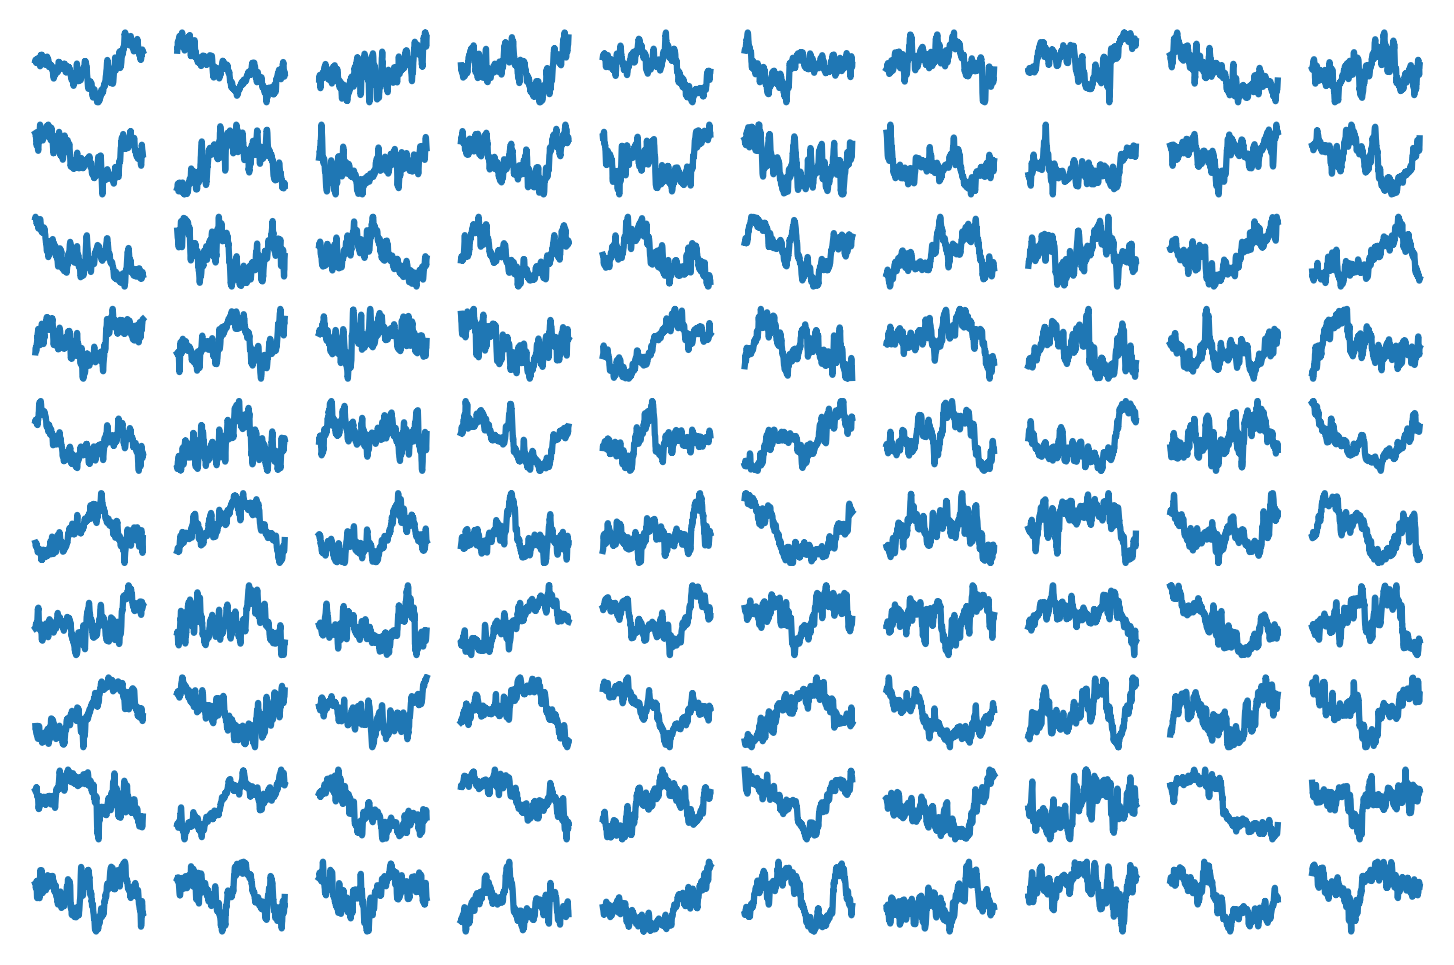

In [106]:
model = load_model('generator.h5')
# generate images
latent_points = generate_latent_points(100, 100)
# generate images
X = model.predict(latent_points)
# plot the result
print(X.shape)
show_plot(X, 10)

(100, 640, 1)


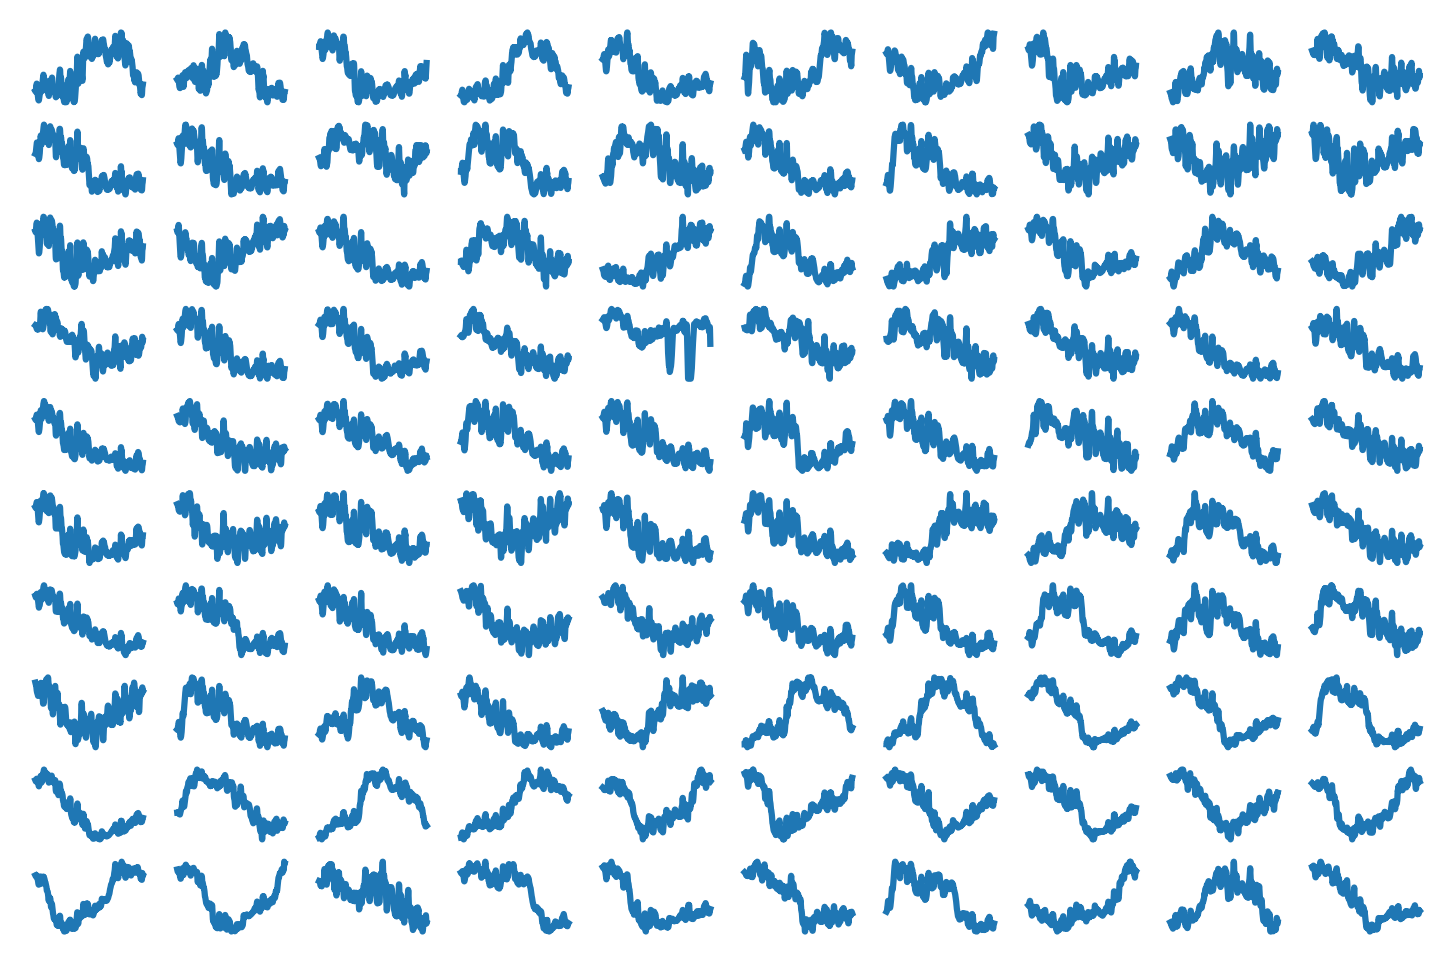

In [107]:
# model = load_model('generator.h5')
# generate images
# latent_points = generate_latent_points(100, 100)
# generate images
X = np.expand_dims(x_train[400:500,:640],axis =-1)
# plot the result
print(X.shape)
show_plot(X, 10)

# MiniRocket

In [91]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
import minirocket_multivarient
from minirocket import fit, transform
from sklearn.linear_model import RidgeClassifierCV

In [110]:
parameter = fit(x_train[:,:],num_features = 5_000,
                                        max_dilations_per_kernel = 128)

X_training_transform = transform(x_train[:,:],parameter)

classifier = RidgeClassifierCV(alphas = np.logspace(-3, 3, 10), normalize = True)
classifier.fit(X_training_transform, y_train)

predictions = classifier.predict(X_training_transform)
print("train accuracy: ", accuracy_score(y_train , predictions))

X_test_transform = transform(x_test[:,:], parameter)
predictions = classifier.predict(X_test_transform)

print('test accuracy: ',accuracy_score(y_test,predictions))
print('test recall restriction: ',recall_score(y_test,predictions,pos_label="RESTRICTION"))
print('test recall NORMAL: ',recall_score(y_test,predictions,pos_label="NORMAL"))

train accuracy:  0.9981072555205047
test accuracy:  0.7705192629815746
test recall restriction:  0.8862275449101796
test recall NORMAL:  0.623574144486692


# Generating fake signal without labels

In [93]:
model = load_model('generator.h5')
# generate images
n_fake_samples = 5000
latent_points = generate_latent_points(100, n_fake_samples)
# generate images
X_fake = model.predict(latent_points)
# shape of X 
print(X_fake.shape)

(5000, 640, 1)


In [94]:
X_fake_transform = transform(X_fake[:,:640,0],parameter)
predictions = classifier.predict(X_fake_transform)

In [95]:
np.unique(predictions,return_counts=True)

(array(['RESTRICTION'], dtype='<U11'), array([5000]))

In [96]:
X_fake_2 = np.concatenate([x_train[:,:640], X_fake[:,:,0]])
Y_fake_2 = np.concatenate([y_train, predictions])
# 
print(X_fake_2.shape)
print(Y_fake_2.shape)

(6585, 640)
(6585,)


In [111]:
parameter = fit(X_fake_2[:,:640],num_features = 5_000,
                                        max_dilations_per_kernel = 128)

X_training_transform = transform(X_fake_2[:,:640],parameter)

classifier = RidgeClassifierCV(alphas = np.logspace(-3, 3, 10), normalize = True)
classifier.fit(X_training_transform, Y_fake_2)

predictions = classifier.predict(X_training_transform)
print("train accuracy: ", accuracy_score(Y_fake_2 , predictions))

X_test_transform = transform(x_test[:,:640], parameter)
predictions = classifier.predict(X_test_transform)

print('test accuracy: ',accuracy_score(y_test,predictions))
print('restriction recall', recall_score(y_test, predictions, pos_label='RESTRICTION'))
print('Normal recall', recall_score(y_test, predictions, pos_label='NORMAL'))

train accuracy:  0.9928625664388763
test accuracy:  0.7755443886097152
restriction recall 0.8832335329341318
Normal recall 0.6387832699619772
